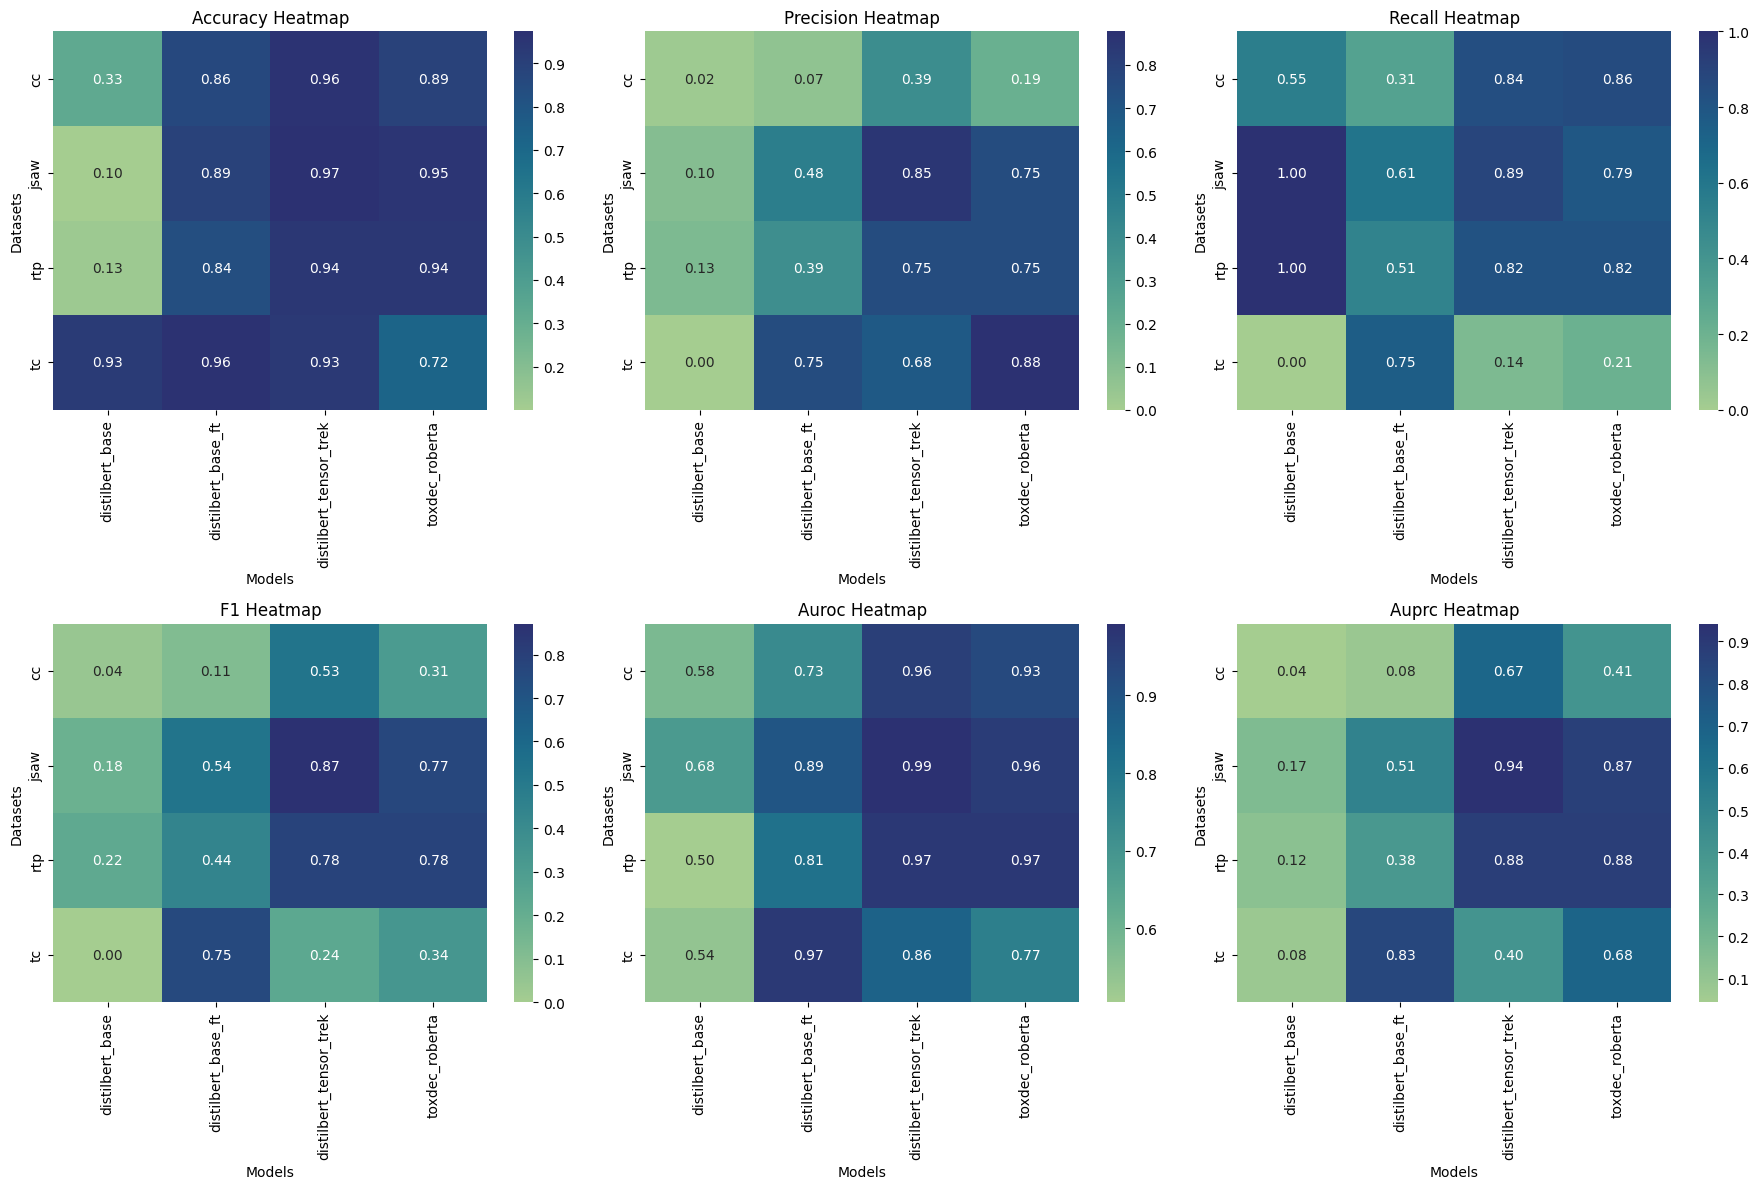

In [4]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pickle_directory = "./results"

# Metrics to extract
metrics = ["accuracy", "precision", "recall", "f1", "AUROC", "AUPRC"]

datasets = set()
models = set()

pickle_files = sorted([f for f in os.listdir(pickle_directory) if f.endswith(".pkl")])
for file in pickle_files:
    dataset, model = file.split("_", 1)
    datasets.add(dataset)
    models.add(model.split(".")[0])

datasets = sorted(datasets)
models = sorted(models)

data = {metric: np.zeros((len(datasets), len(models))) for metric in metrics}

for file in pickle_files:
    dataset, model = file.split("_", 1)
    model = model.split(".")[0]
    
    with open(os.path.join(pickle_directory, file), "rb") as f:
        results = pickle.load(f)
        for metric in metrics:
            dataset_idx = datasets.index(dataset)
            model_idx = models.index(model)
            if metric in results:  # Ensure the metric exists in the results
                data[metric][dataset_idx, model_idx] = results[metric]

dataframes = {
    metric: pd.DataFrame(data[metric], index=datasets, columns=models) for metric in metrics
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.heatmap(dataframes[metric], annot=True, fmt=".2f", cmap="crest", cbar=True, ax=ax)
    ax.set_title(f"{metric.capitalize()} Heatmap")
    ax.set_xlabel("Models")
    ax.set_ylabel("Datasets")

if len(metrics) < len(axes):
    for ax in axes[len(metrics):]:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [5]:
!pip install seaborn

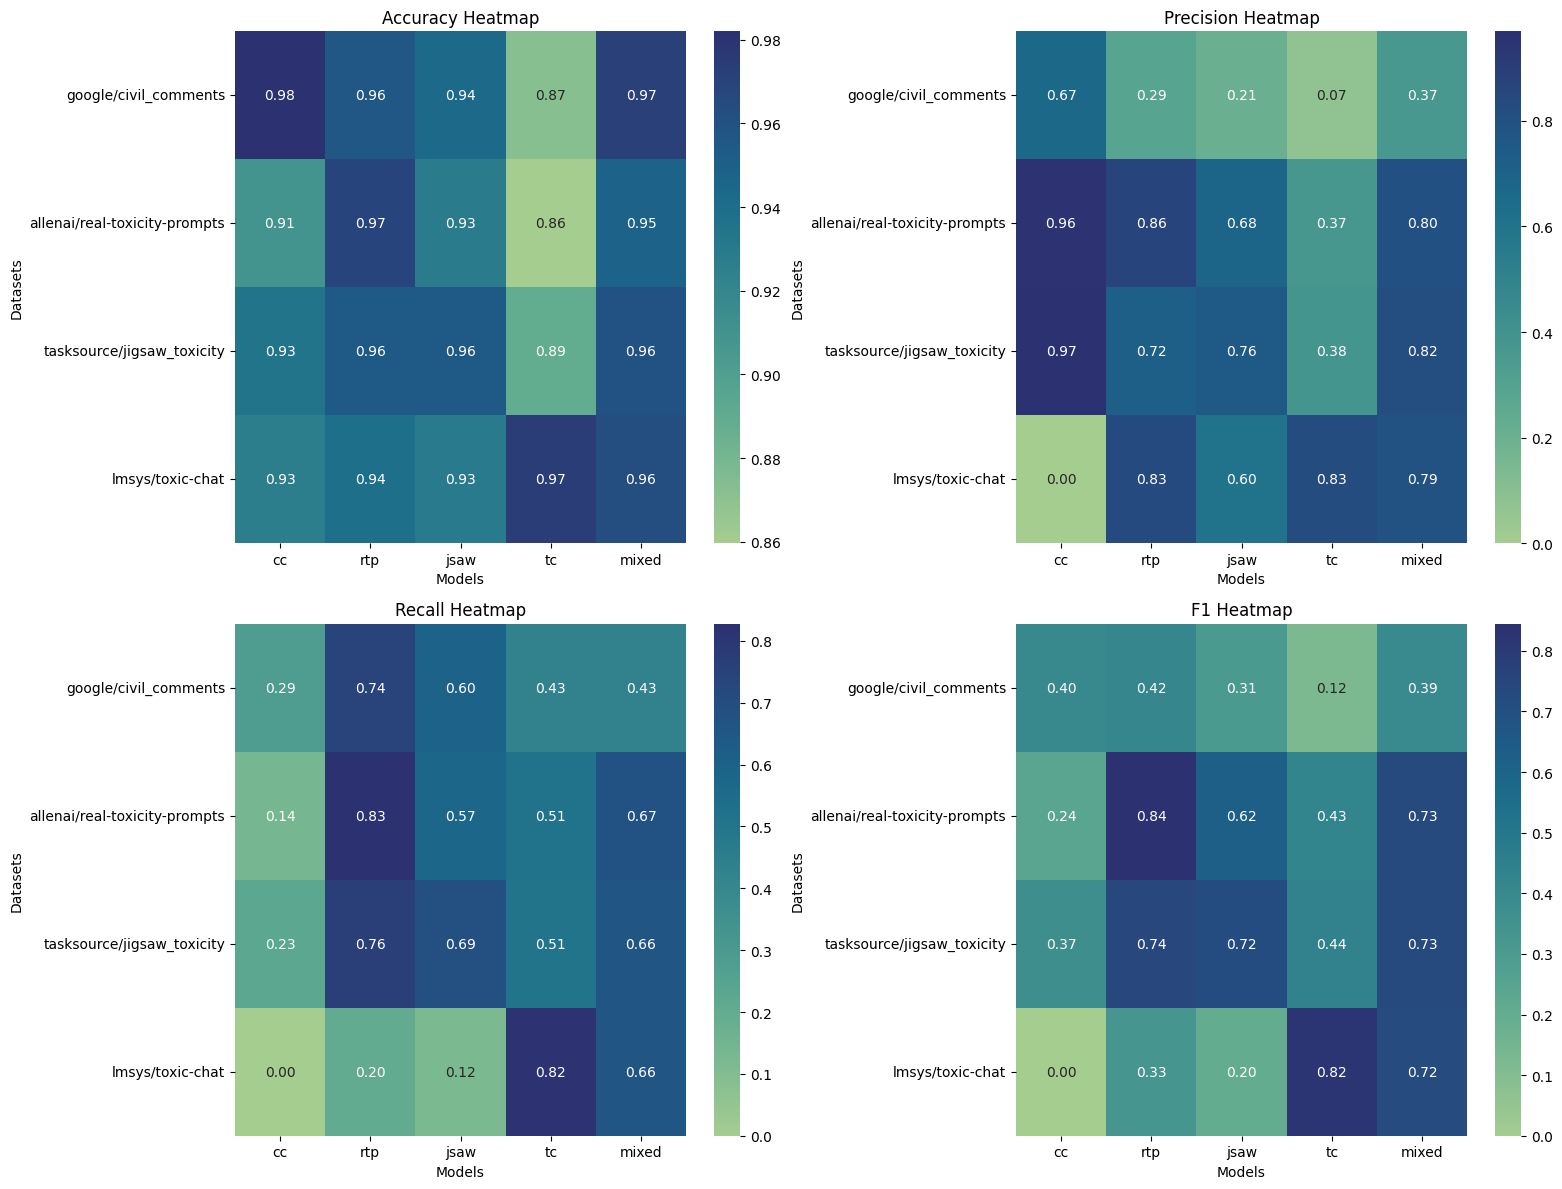

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

repo_name = "inxoy/toxicbench-ablation"
dataset = load_dataset(repo_name)

metrics_data = dataset["metrics"].to_pandas()

metrics = ["accuracy", "precision", "recall", "f1", "AUROC", "AUPRC"]
ordered_datasets = [
    "google/civil_comments",
    "allenai/real-toxicity-prompts",
    "tasksource/jigsaw_toxicity",
    "lmsys/toxic-chat"
]
ordered_models = ["cc", "rtp", "jsaw", "tc", "mixed"]  # Updated model order

data = {metric: np.zeros((len(ordered_datasets), len(ordered_models))) for metric in metrics}

for _, row in metrics_data.iterrows():
    dataset_idx = ordered_datasets.index(row["dataset"])
    model_idx = ordered_models.index(row["model"])
    for metric in metrics:
        if metric in row:  # Ensure the metric exists in the row
            data[metric][dataset_idx, model_idx] = row[metric]

dataframes = {
    metric: pd.DataFrame(data[metric], index=ordered_datasets, columns=ordered_models) for metric in metrics
}

# Plot heatmaps in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Adjust for 4 metrics
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.heatmap(
        dataframes[metric],
        annot=True,
        fmt=".2f",
        cmap="crest",  # Maintain the same color palette
        cbar=True,
        ax=ax
    )
    ax.set_title(f"{metric.capitalize()} Heatmap")
    ax.set_xlabel("Models")
    ax.set_ylabel("Datasets")

# Hide unused axes if fewer than 4 metrics
for ax in axes[len(metrics):]:
    ax.axis("off")

# Adjust layout
plt.tight_layout()
plt.show()


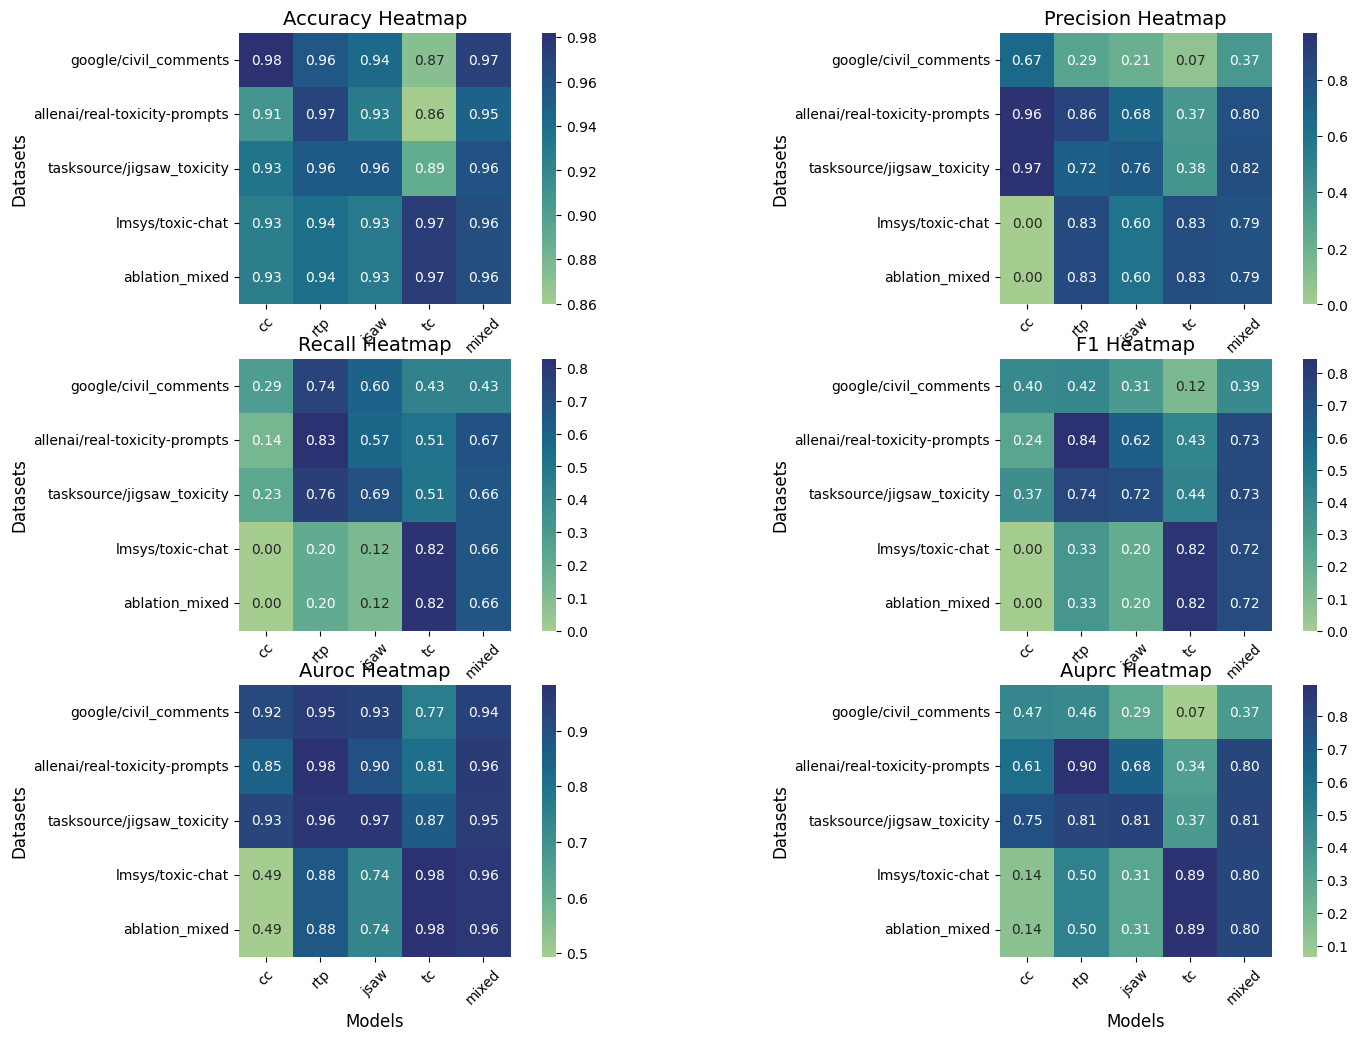

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

repo_name_1 = "inxoy/toxicbench-ablation"
repo_name_2 = "inxoy/toxicbench-ablation-mixed"
dataset_1 = load_dataset(repo_name_1)["metrics"].to_pandas()
dataset_2 = load_dataset(repo_name_2)["metrics"].to_pandas()

metrics = ["accuracy", "precision", "recall", "f1", "AUROC", "AUPRC"]
ordered_datasets = [
    "google/civil_comments",
    "allenai/real-toxicity-prompts",
    "tasksource/jigsaw_toxicity",
    "lmsys/toxic-chat",
    "ablation_mixed"  # Combine this dataset into the same heatmap
]
ordered_models = ["cc", "rtp", "jsaw", "tc", "mixed"]

data = {metric: np.zeros((len(ordered_datasets), len(ordered_models))) for metric in metrics}

for _, row in dataset_1.iterrows():
    dataset_idx = ordered_datasets.index(row["dataset"])
    model_idx = ordered_models.index(row["model"])
    for metric in metrics:
        if metric in row:
            data[metric][dataset_idx, model_idx] = row[metric]

for _, row in dataset_2.iterrows():
    dataset_idx = ordered_datasets.index(row["dataset"])
    model_idx = ordered_models.index(row["model"])
    for metric in metrics:
        if metric in row:
            data[metric][dataset_idx, model_idx] = row[metric]

dataframes = {
    metric: pd.DataFrame(data[metric], index=ordered_datasets, columns=ordered_models) for metric in metrics
}

fig, axes = plt.subplots(3, 2, figsize=(18, 12))  # Adjust figure size for compactness
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.heatmap(
        dataframes[metric],
        annot=True,
        fmt=".2f",
        cmap="crest",
        cbar=True,
        ax=ax,
        square=True,
    )
    ax.set_title(f"{metric.capitalize()} Heatmap", fontsize=14)
    ax.set_xlabel("Models", fontsize=12)
    ax.set_ylabel("Datasets", fontsize=12)
    ax.tick_params(axis="x", labelrotation=45, labelsize=10)
    ax.tick_params(axis="y", labelsize=10)

plt.show()